<a href="https://colab.research.google.com/github/RAFS20/Analisis-de-datos/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Función de análisis de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import variation

# Configuración global para mostrar solo 2 decimales
import sys
sys.displayhook = lambda x: print(f'{round(x, 2):.2f}')
sns.set(style='white')
plt.rcParams.update({'font.family': 'Liberation Serif', 'font.size': 12})

def carga_dataset(ruta_archivo):
    """
    Carga el dataset desde un archivo en formato CSV.
    
    Args:
        ruta_archivo (str): Ruta al archivo CSV.
    
    Returns:
        pd.DataFrame: El dataset cargado como un DataFrame de Pandas.
    """
    return pd.read_csv(ruta_archivo)

def resumen_dataset(dataset):
    """
    Muestra un resumen general del dataset, incluyendo información sobre el número de filas y columnas.
    
    Args:
        dataset (pd.DataFrame): El dataset a resumir.
    """
    print("Resumen del Dataset:")
    print("Número de filas:", dataset.shape[0])
    print("Número de columnas:", dataset.shape[1])
    print()

def analizar_valores_faltantes(dataset):
    """
    Analiza los valores faltantes en el dataset y muestra un resumen.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
    """
    valores_faltantes = dataset.isnull().sum()
    print("Valores faltantes por columna:")
    print(valores_faltantes)
    print()

def analizar_variables_numericas(dataset, ruta_guardado):
    """
    Realiza un análisis de las variables numéricas del dataset y muestra estadísticas descriptivas.
    También grafica histogramas y gráficos de torta para cada variable numérica y guarda los gráficos en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    columnas_numericas = dataset.select_dtypes(include=[np.number])
    if len(columnas_numericas) > 0:
        print("Variables numéricas:")
        print(columnas_numericas.describe())
        print()

        os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

        # Graficar histogramas y gráficos de torta para cada variable numérica y guardar los gráficos
        for columna in columnas_numericas:
            plt.figure(figsize=(12, 4))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(data=dataset, x=columna, kde=True)
            plt.axvline(dataset[columna].median(), color='red', linestyle='--', label=f'Mediana: {dataset[columna].median():.2f}')
            plt.axvline(dataset[columna].mean(), color='green', linestyle='--', label=f'Media: {dataset[columna].mean():.2f} CV: {(dataset[columna].std() / dataset[columna].mean() * 100):.2f}%')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.title('Histograma de ' + columna)
            plt.legend()

            # Gráfico de torta con rangos
            plt.subplot(1, 2, 2)
            rangos = pd.qcut(dataset[columna], q=5)  # Dividir la variable en 5 rangos
            conteo_rangos = rangos.value_counts(normalize=True)

            # Convertir los intervalos en etiquetas legibles y limitarlos a 2 decimales
            etiquetas = [f'{intervalo.left:.2f} - {intervalo.right:.2f}' for intervalo in conteo_rangos.index]

            # Configurar el formato de los valores en el gráfico de torta
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda valor, _: '{:.2%}'.format(valor)))

            plt.pie(conteo_rangos, labels=etiquetas, autopct='%.2f%%', startangle=90)
            plt.title('Gráfico de Torta - Rangos de ' + columna)

            plt.suptitle('Análisis de ' + columna, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(ruta_guardado, 'analisis_' + columna + '.svg'), format='svg')
            plt.show()

        print()
    else:
        print("No se encontraron variables numéricas en el dataset.")
        print()

def analizar_variables_categoricas(dataset, ruta_guardado):
    """
    Realiza un análisis de las variables categóricas del dataset y muestra estadísticas descriptivas.
    También grafica gráficos de torta y gráficos de barras para cada variable categórica y guarda los gráficos en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    columnas_categoricas = dataset.select_dtypes(include=['object', 'category'])
    if len(columnas_categoricas) > 0:
        print("Variables categóricas:")
        for columna in columnas_categoricas:
            print("Columna:", columna)
            print("Valores únicos:", dataset[columna].unique())
            print("Frecuencia de valores:")
            print(dataset[columna].value_counts())
            print("Proporción de valores:")
            proporciones = dataset[columna].value_counts(normalize=True).map('{:.2%}'.format)
            print(proporciones)
            print()

            os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

            # Graficar gráficos de torta y gráficos de barras para cada variable categórica y guardar los gráficos
            plt.figure(figsize=(12, 4))

            # Gráfico de torta
            plt.subplot(1, 2, 1)
            conteo_categorias = dataset[columna].value_counts(normalize=True)
            plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%.2f%%', startangle=90)
            plt.title('Gráfico de Torta - ' + columna)

            # Gráfico de barras
            plt.subplot(1, 2, 2)
            conteo_barras = dataset[columna].value_counts()
            plt.bar(conteo_barras.index.astype(str), conteo_barras.values)
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.title('Gráfico de Barras - ' + columna)
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda valor, _: '{:.2f}'.format(valor)))

            plt.suptitle('Análisis de ' + columna, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(ruta_guardado, 'analisis_' + columna + '.svg'), format='svg')
            plt.show()

    else:
        print("No se encontraron variables categóricas en el dataset.")
        print()

def combinar_variables_categoricas_numericas(dataset, ruta_guardado):
    """
    Combina todas las variables categóricas con todas las variables numéricas en gráficos y guarda los gráficos en archivos .svg
    en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

    columnas_categoricas = dataset.select_dtypes(include=['object', 'category'])
    columnas_numericas = dataset.select_dtypes(include=[np.number])

    if len(columnas_categoricas) > 0 and len(columnas_numericas) > 0:
        for columna_cat in columnas_categoricas:
            for columna_num in columnas_numericas:
                plt.figure(figsize=(12, 6))
                
                # Boxplot
                plt.subplot(1, 3, 1)
                sns.boxplot(data=dataset, x=columna_cat, y=columna_num)
                valores_mediana = dataset.groupby(columna_cat)[columna_num].median()
                for i, mediana in enumerate(valores_mediana):
                    plt.text(i, mediana, f'{mediana:.2f}', horizontalalignment='center', color='white', weight='bold')
                plt.xlabel(columna_cat)
                plt.ylabel(columna_num)
                plt.title(f'Boxplot de {columna_num} por {columna_cat}')
                plt.xticks(rotation=45)
                
                # Histogramas
                plt.subplot(1, 3, 2)
                for categoria in dataset[columna_cat].unique():
                    sns.kdeplot(data=dataset[dataset[columna_cat] == categoria], x=columna_num, label=str(categoria), linewidth=2)
                valores_mediana_linea = dataset.groupby(columna_cat)[columna_num].median()
                for i, mediana in enumerate(valores_mediana_linea):
                    plt.axvline(mediana, color=sns.color_palette()[i], linestyle='--', linewidth=2)
                plt.xlabel(columna_num)
                plt.ylabel('Densidad')
                plt.title(f'Histograma de {columna_num} por {columna_cat}')
                plt.legend()

                # Gráfico de barras apiladas
                plt.subplot(1, 3, 3)
                rangos = pd.qcut(dataset[columna_num], q=5)  # Dividir la variable en 5 rangos
                etiquetas_rango = [f'{intervalo.left:.2f} - {intervalo.right:.2f}' for intervalo in pd.Categorical(rangos).categories]  # Convertir intervalos en etiquetas legibles
                conteo_apilado = dataset.groupby([rangos, columna_cat]).size().unstack().apply(lambda x: x / x.sum(), axis=1)
                conteo_apilado.plot(kind='bar', stacked=True, ax=plt.gca())
                plt.xlabel('Rango de ' + columna_num)
                plt.ylabel('Porcentaje')
                plt.title(f'Gráfico de Barras - Rangos de {columna_num} divididos por {columna_cat}')
                plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda valor, _: '{:.2%}'.format(valor)))

                # Agregar etiquetas de datos porcentuales en las barras apiladas
                for rect in plt.gca().patches:
                    ancho = rect.get_width()
                    altura = rect.get_height()
                    x = rect.get_x()
                    y = rect.get_y()
                    texto_etiqueta = f'{altura:.0%}'  # Eliminar decimales en las etiquetas de datos porcentuales
                    x_etiqueta = x + ancho / 2
                    y_etiqueta = y + altura / 2
                    plt.text(x_etiqueta, y_etiqueta, texto_etiqueta, ha='center', va='center')
                    
                plt.xticks(range(len(etiquetas_rango)), etiquetas_rango, rotation=45)  # Usar las etiquetas legibles en el eje x

                plt.suptitle(f'Análisis de {columna_num} por {columna_cat}', y=1.05)
                plt.tight_layout()
                plt.savefig(os.path.join(ruta_guardado, f'analisis_{columna_num}_por_{columna_cat}.svg'), format='svg')
                plt.show()
    else:
        print("No se encontraron variables categóricas o numéricas en el dataset.")
        print()


def analizar_dataset(dataset):
    """
    Realiza un análisis del dataset, incluyendo un resumen general, análisis de valores faltantes,
    análisis de variables numéricas, análisis de variables categóricas y combinación de variables categóricas y numéricas.
    Guarda los gráficos en carpetas separadas.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
    """
    resumen_dataset(dataset)
    analizar_valores_faltantes(dataset)
    analizar_variables_numericas(dataset, 'variables_numericas')
    analizar_variables_categoricas(dataset, 'variables_categoricas')
    combinar_variables_categoricas_numericas(dataset, 'graficos_combinados')



In [2]:
import pandas as pd
import numpy as np

# Definir el tamaño del dataset
num_filas = 100

# Definir las columnas y tipos de variables
columnas = ['ID', 'Edad', 'Altura', 'Peso', 'Ingreso', 'Categoría', 'Variable1', 'Variable2']
tipos = [np.int64, np.int64, np.float64, np.float64, np.float64, 'category', 'category', 'category']

# Generar datos simulados
datos = {
    'ID': np.arange(num_filas),
    'Edad': np.random.randint(18, 65, size=num_filas),
    'Altura': np.random.normal(170, 10, size=num_filas),
    'Peso': np.random.normal(65, 12, size=num_filas),
    'Ingreso': np.random.uniform(20000, 100000, size=num_filas),
    'Categoría': np.random.choice(['A', 'B', 'C'], size=num_filas),
    'Variable1': np.random.choice(['X', 'Y', 'Z'], size=num_filas),
    'Variable2': np.random.choice(['P', 'Q', 'R'], size=num_filas)
}

# Crear el DataFrame
df = pd.DataFrame(datos, columns=columnas).astype(dict(zip(columnas, tipos)))

# Mostrar el DataFrame
print(df.head())



   ID  Edad      Altura       Peso       Ingreso Categoría Variable1 Variable2
0   0    58  170.671326  60.112958  55930.427265         A         Z         Q
1   1    31  168.092069  56.371778  38371.999382         A         Y         Q
2   2    37  171.307724  60.620140  63960.441514         B         Y         Q
3   3    30  162.629466  81.292463  24764.320523         A         Z         P
4   4    42  163.670161  62.936753  40988.902510         A         Y         P


Resumen del Dataset:
Número de filas: 100
Número de columnas: 8

Valores faltantes por columna:
ID           0
Edad         0
Altura       0
Peso         0
Ingreso      0
Categoría    0
Variable1    0
Variable2    0
dtype: int64

Variables numéricas:
               ID        Edad      Altura        Peso       Ingreso
count  100.000000  100.000000  100.000000  100.000000    100.000000
mean    49.500000   41.390000  171.022873   66.961867  60264.266066
std     29.011492   13.514597    8.863127   12.117724  23029.758367
min      0.000000   18.000000  149.286587   39.091132  21046.169410
25%     24.750000   30.000000  165.506748   58.467724  39981.868542
50%     49.500000   40.500000  171.619568   66.677648  60673.144678
75%     74.250000   53.000000  176.923430   75.508294  77963.100652
max     99.000000   64.000000  193.447429   93.936753  99447.749978



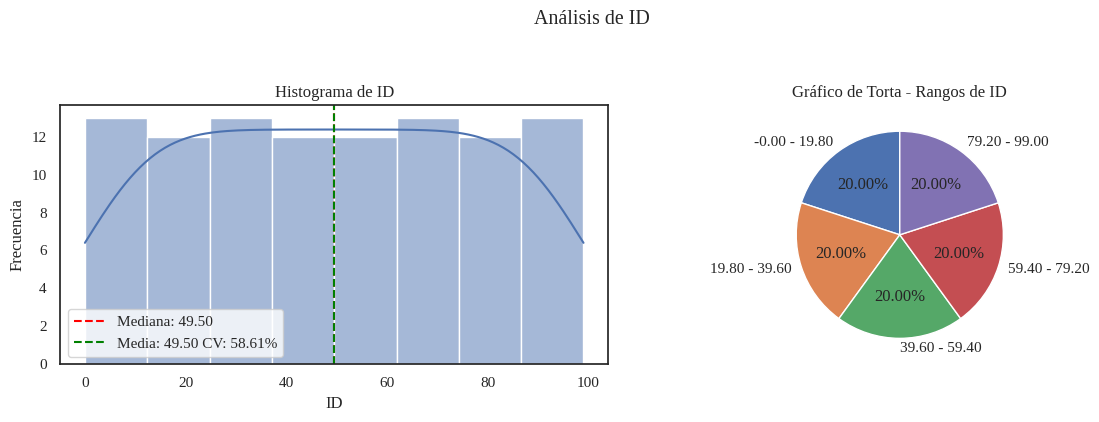

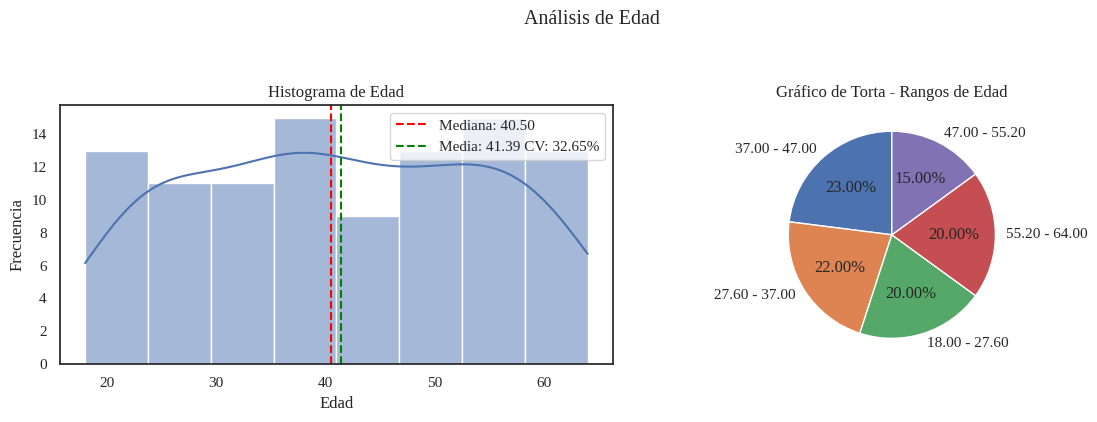

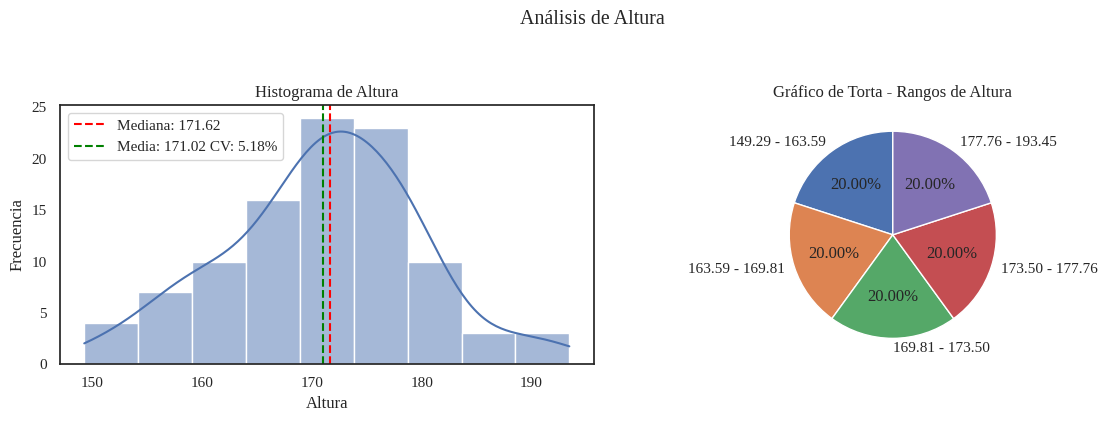

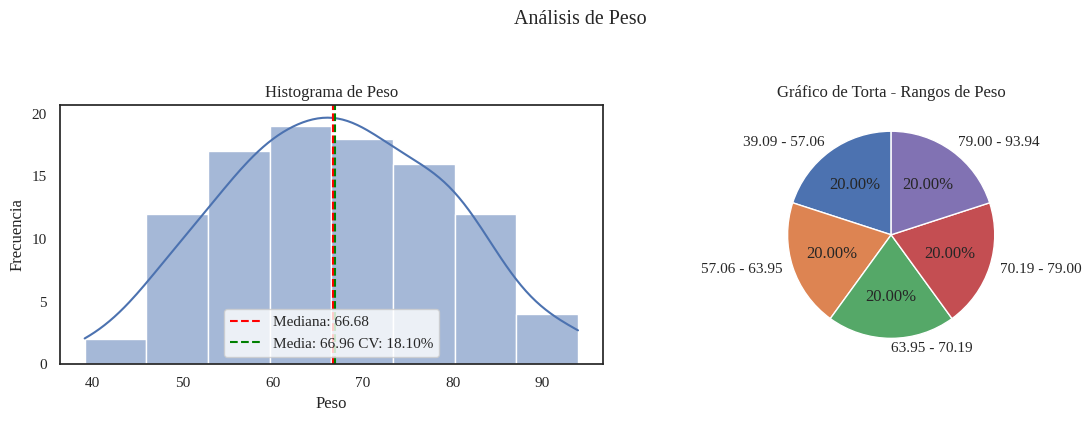

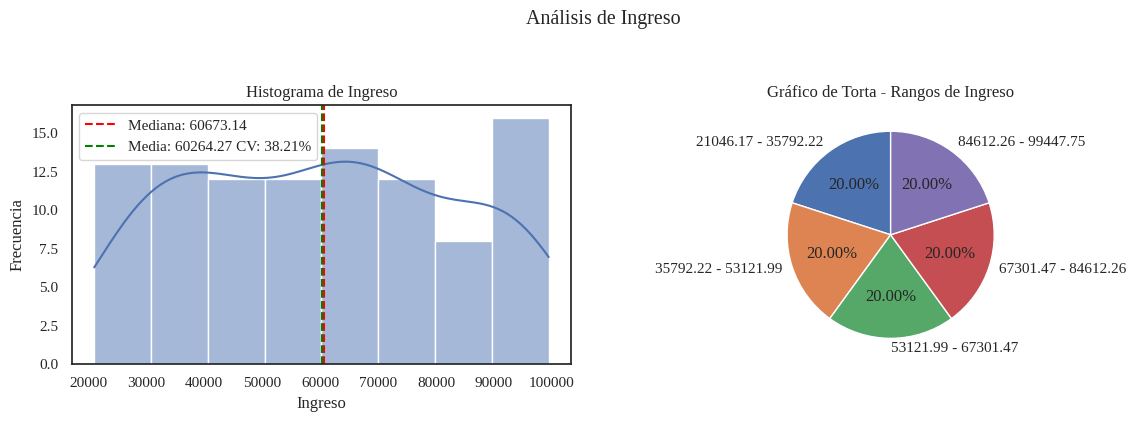


Variables categóricas:
Columna: Categoría
Valores únicos: ['A', 'B', 'C']
Categories (3, object): ['A', 'B', 'C']
Frecuencia de valores:
A    35
B    33
C    32
Name: Categoría, dtype: int64
Proporción de valores:
A    35.00%
B    33.00%
C    32.00%
Name: Categoría, dtype: object



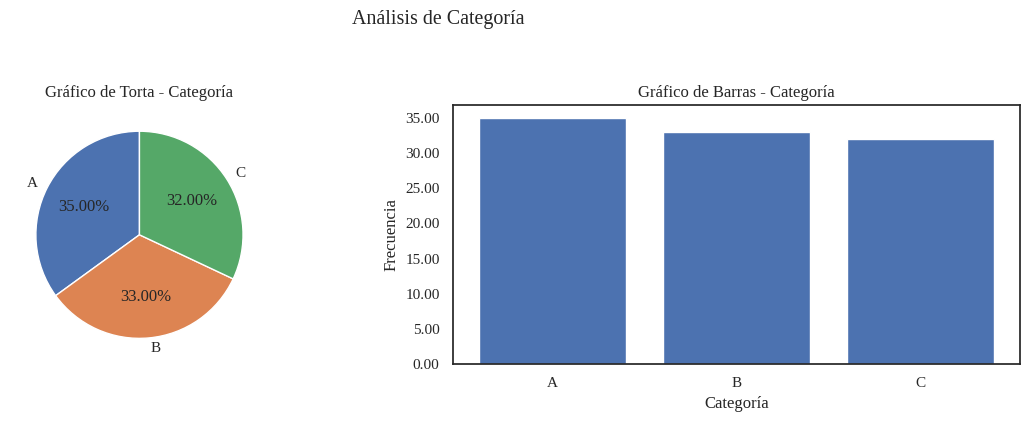

Columna: Variable1
Valores únicos: ['Z', 'Y', 'X']
Categories (3, object): ['X', 'Y', 'Z']
Frecuencia de valores:
X    35
Y    34
Z    31
Name: Variable1, dtype: int64
Proporción de valores:
X    35.00%
Y    34.00%
Z    31.00%
Name: Variable1, dtype: object



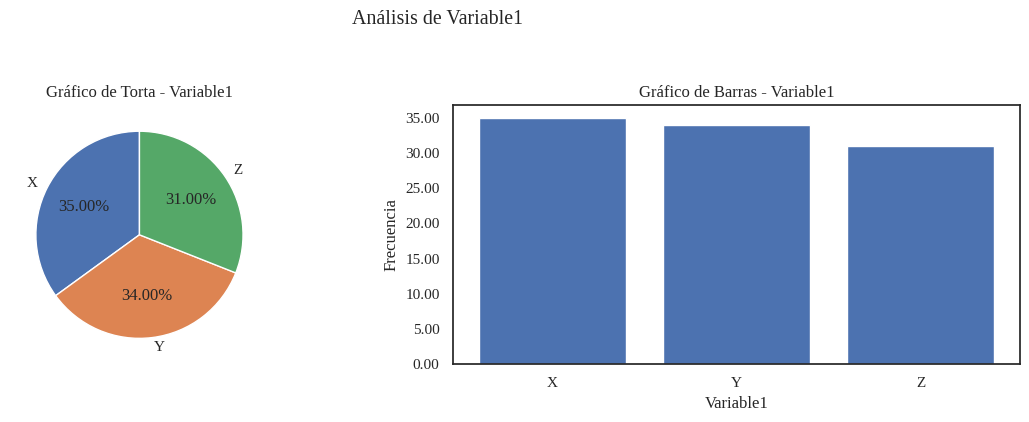

Columna: Variable2
Valores únicos: ['Q', 'P', 'R']
Categories (3, object): ['P', 'Q', 'R']
Frecuencia de valores:
P    37
Q    34
R    29
Name: Variable2, dtype: int64
Proporción de valores:
P    37.00%
Q    34.00%
R    29.00%
Name: Variable2, dtype: object



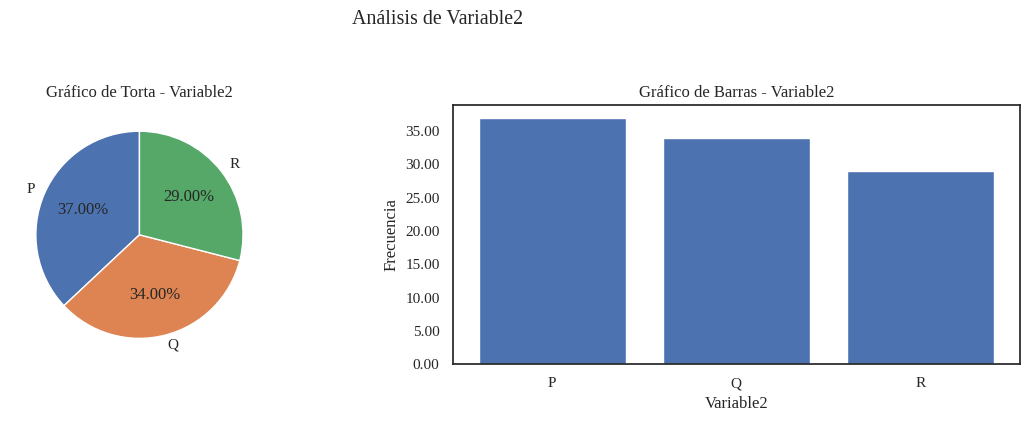

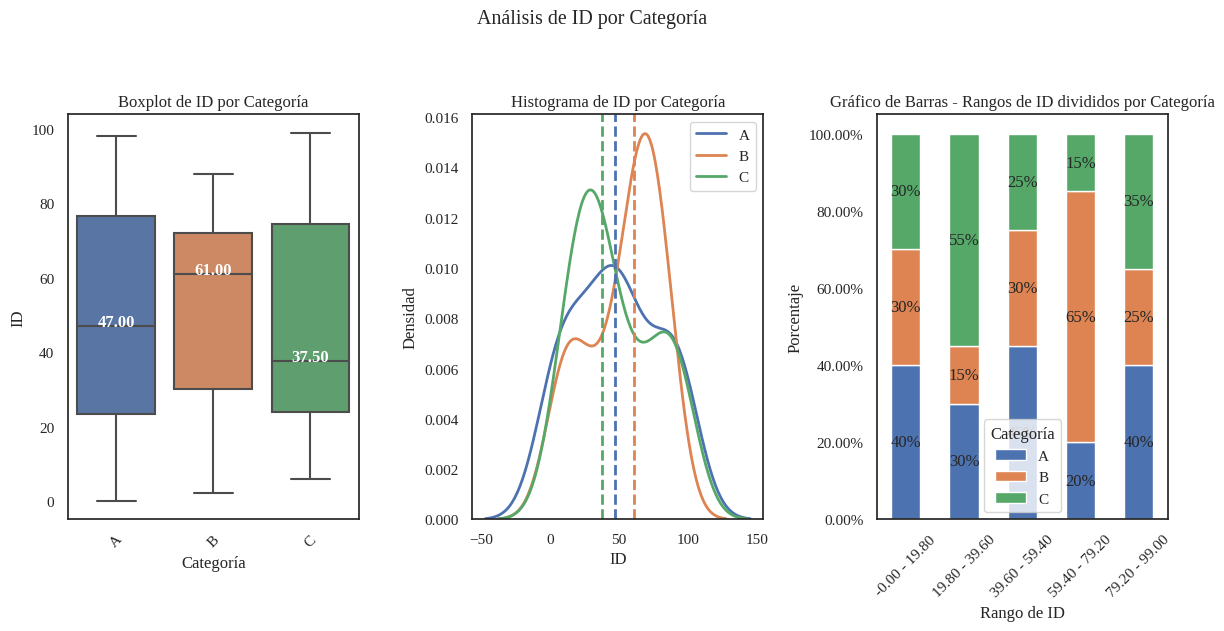

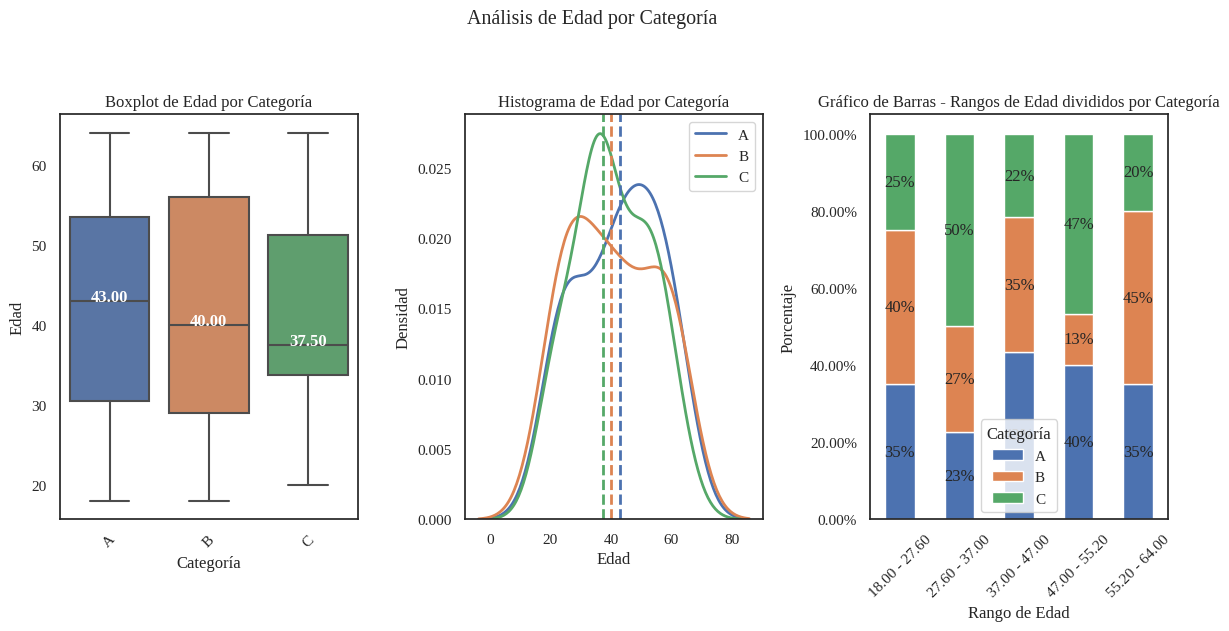

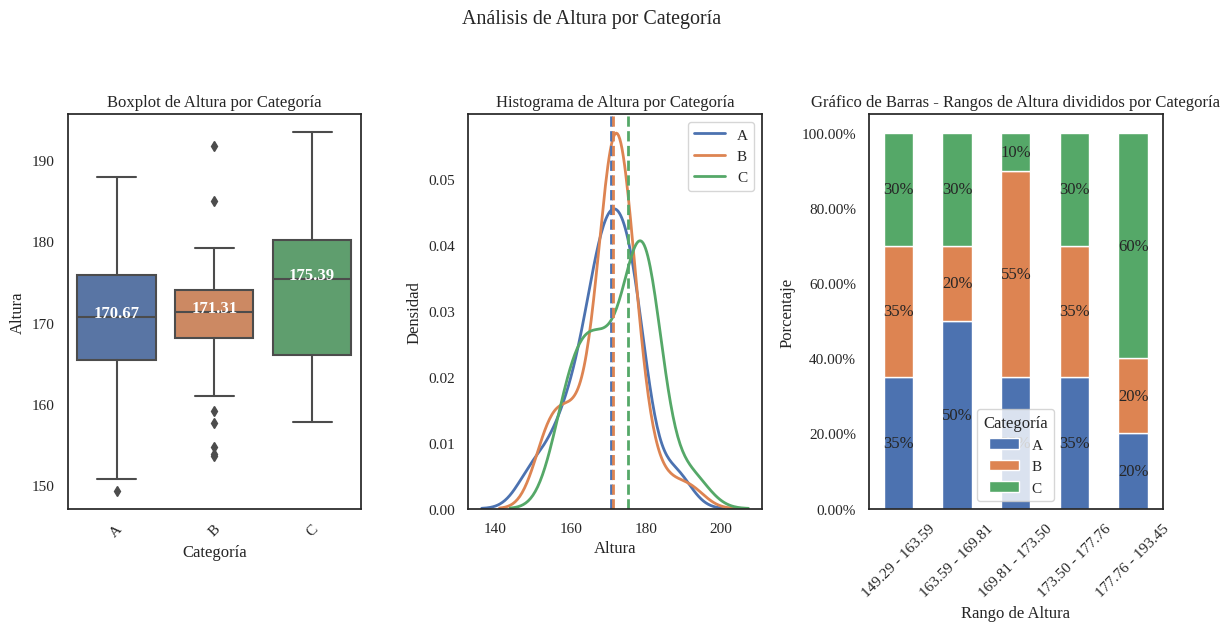

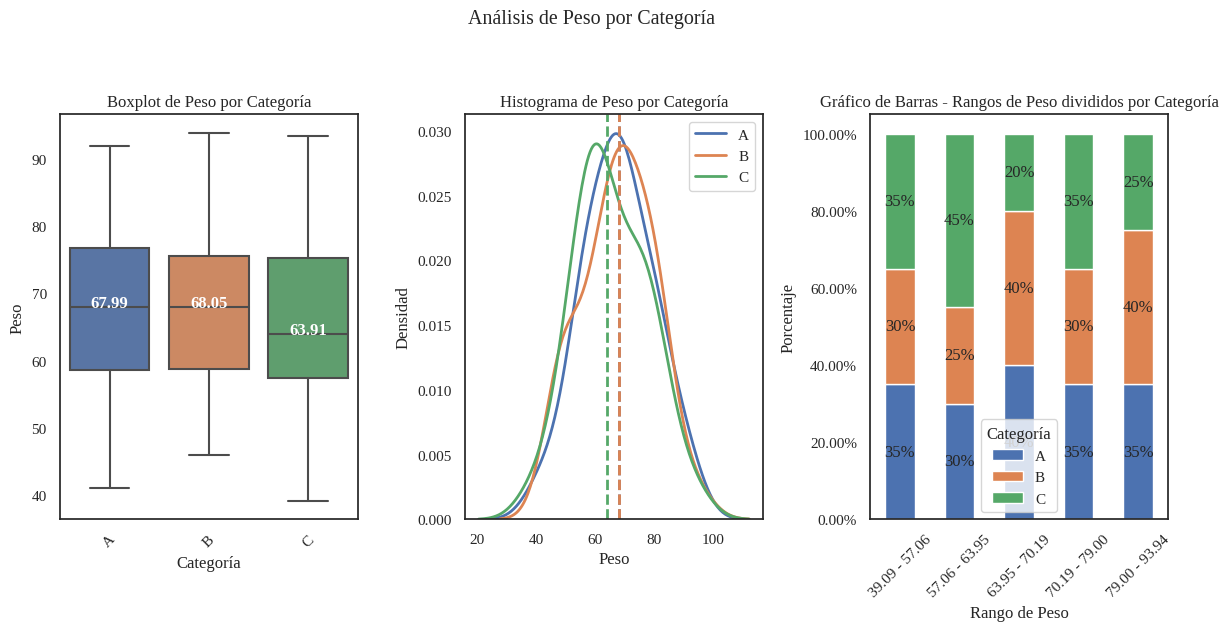

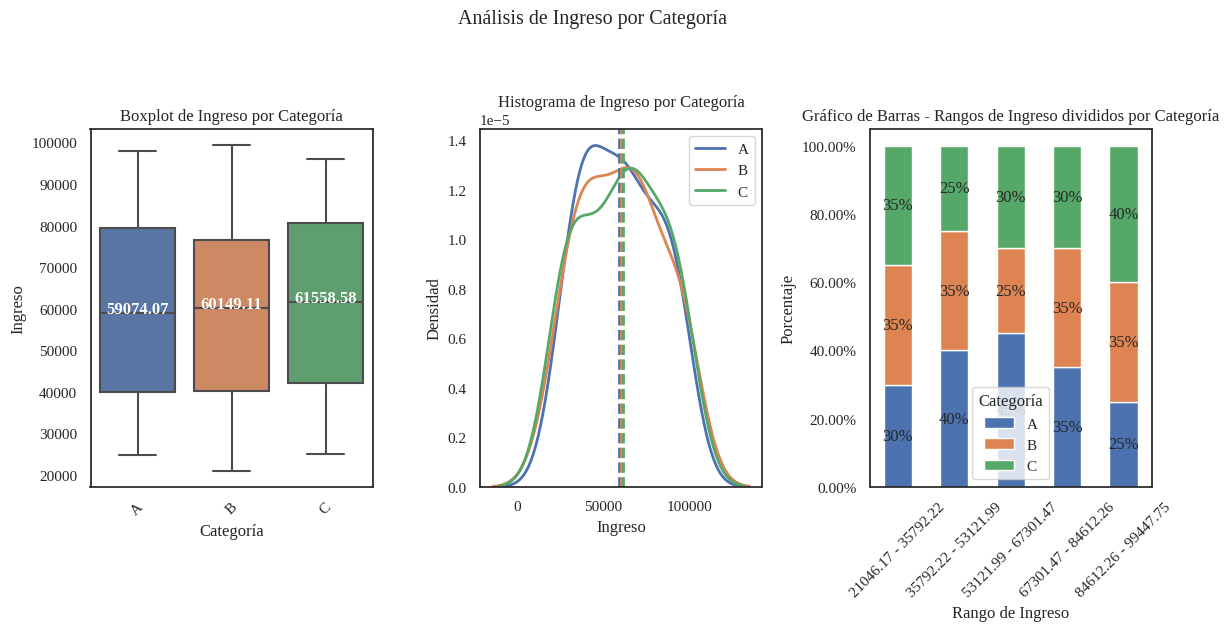

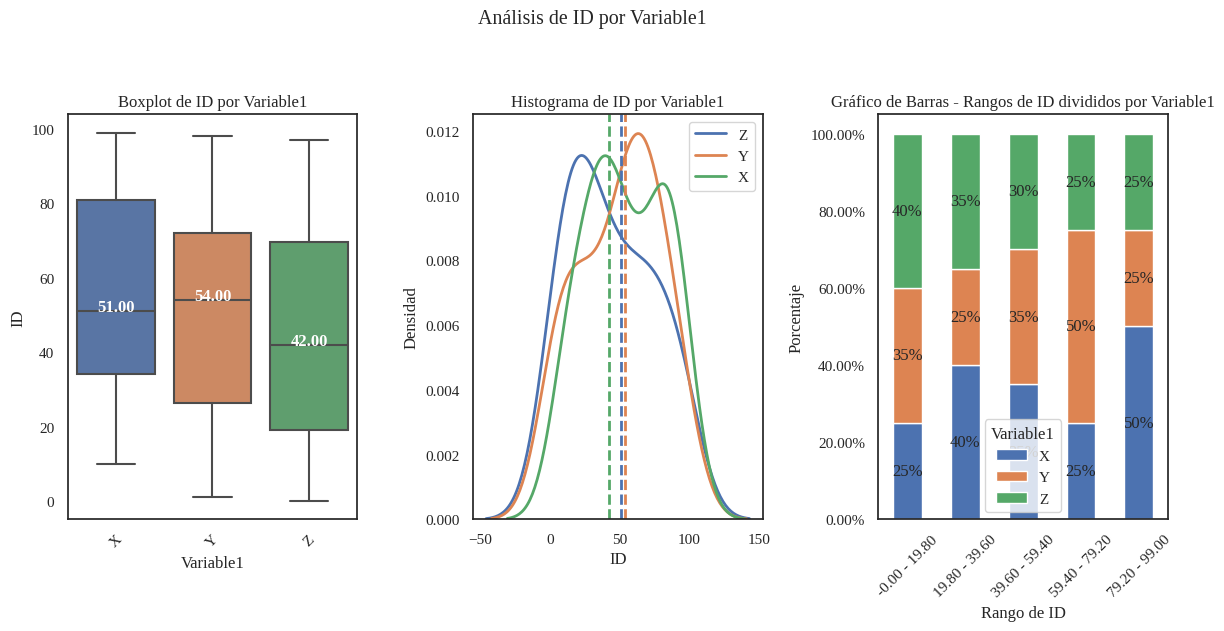

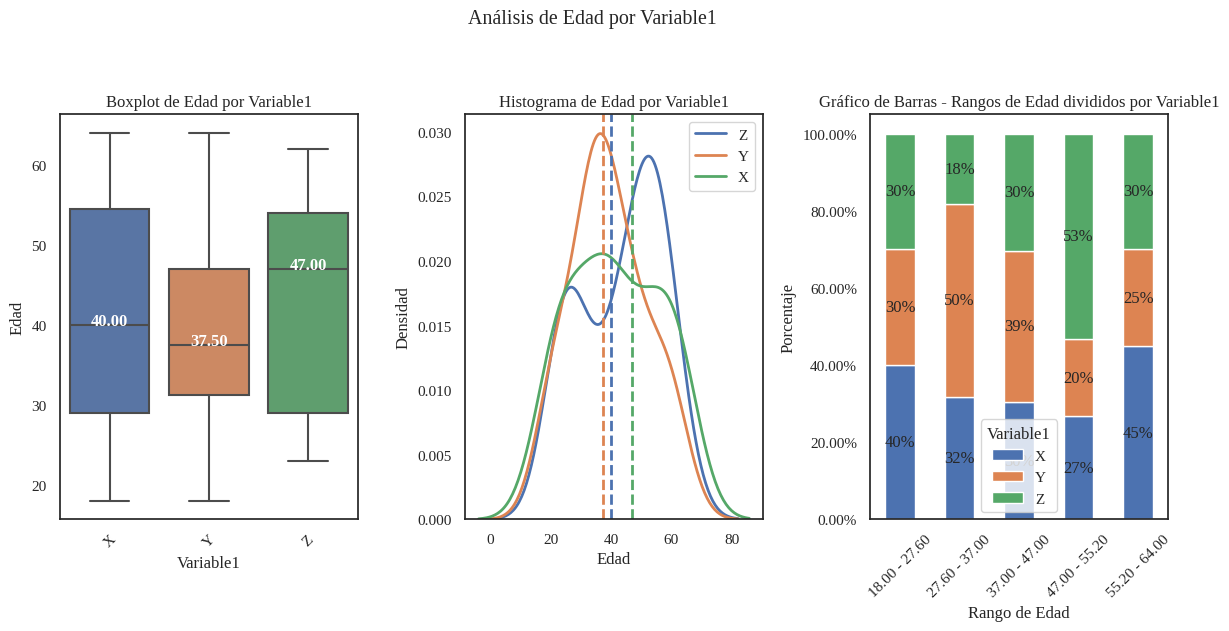

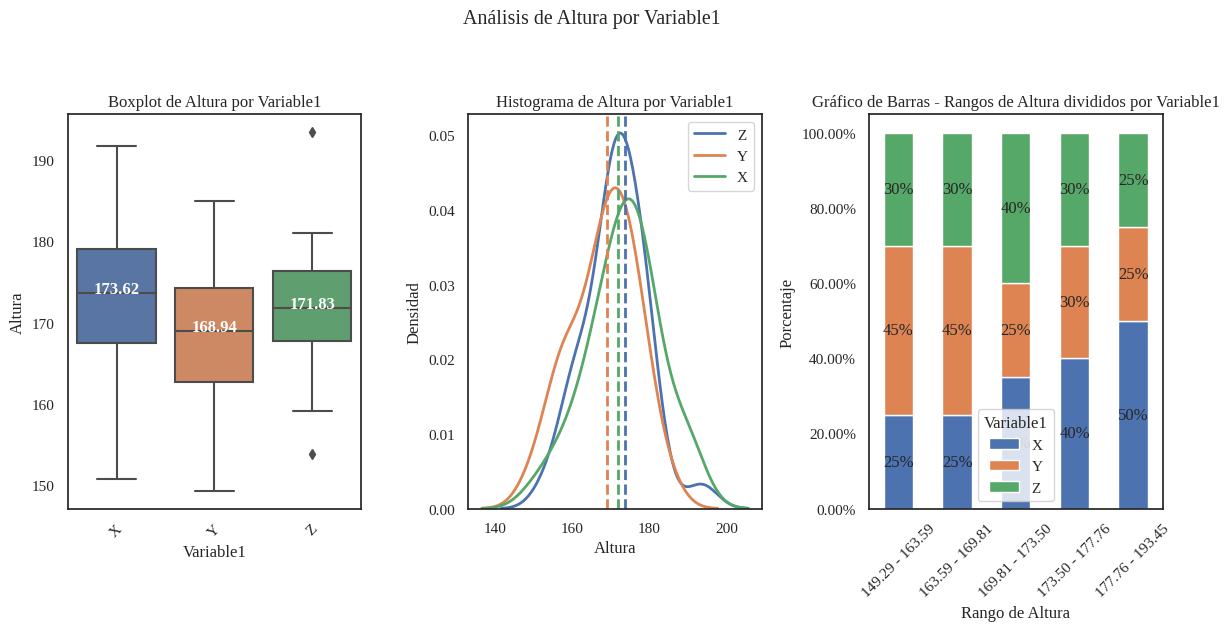

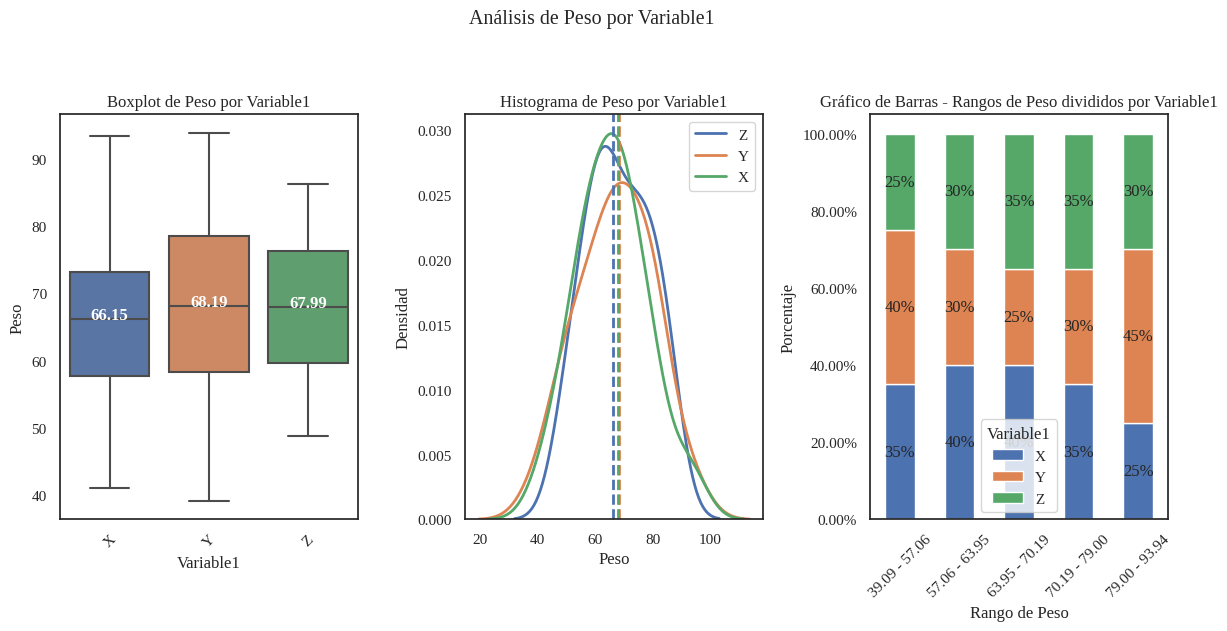

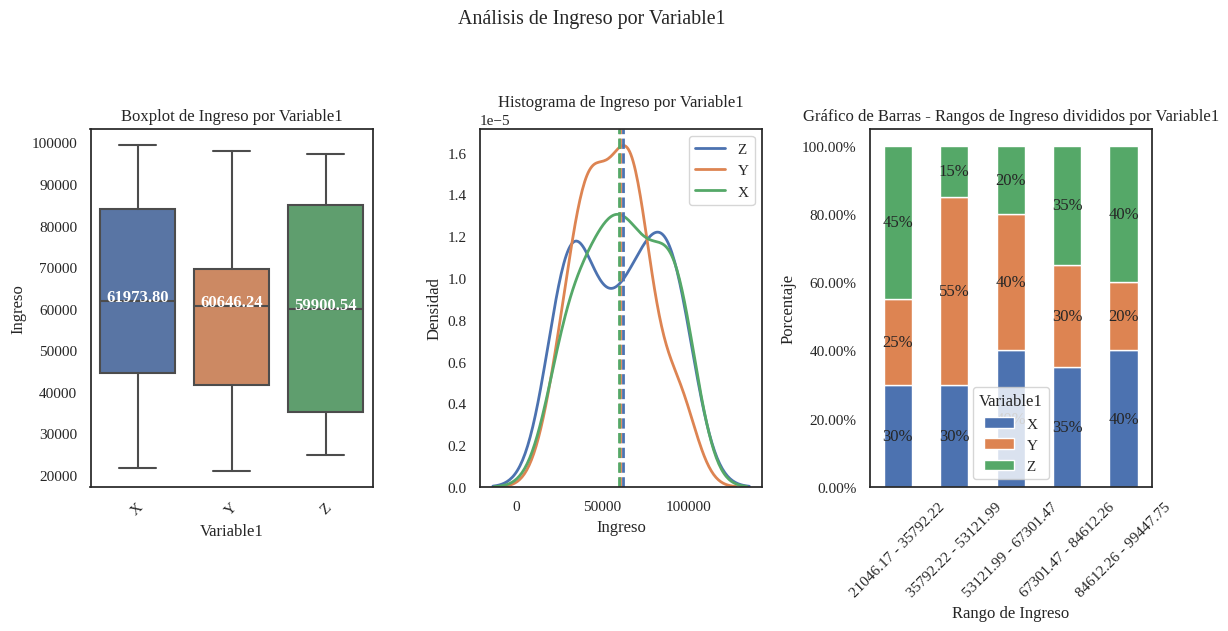

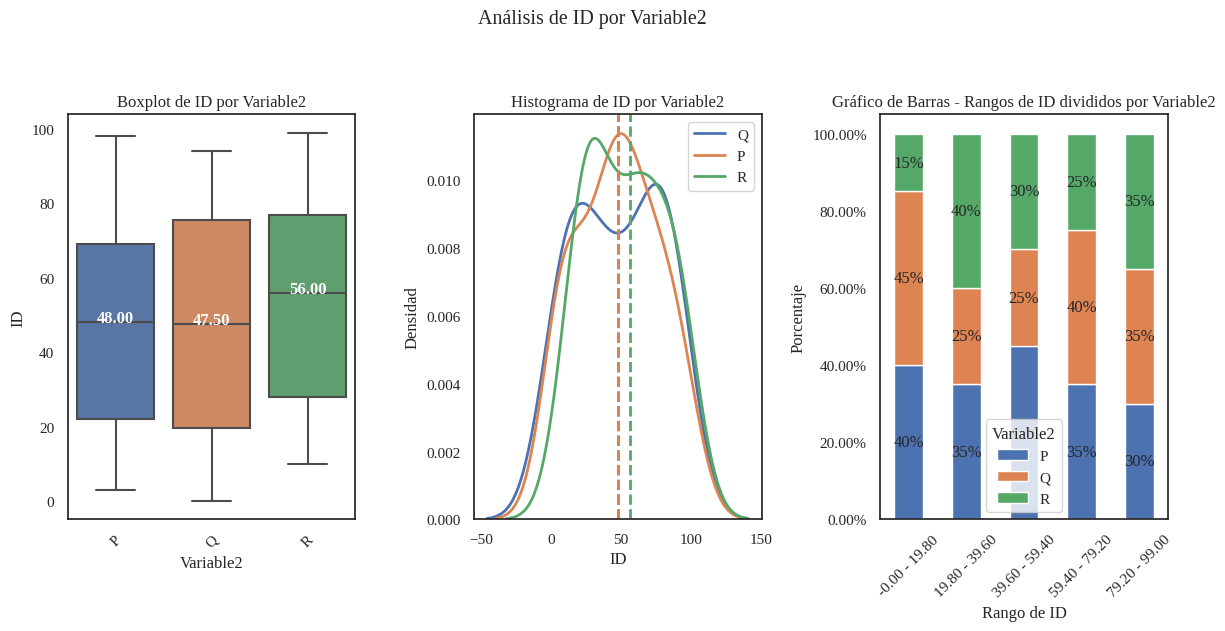

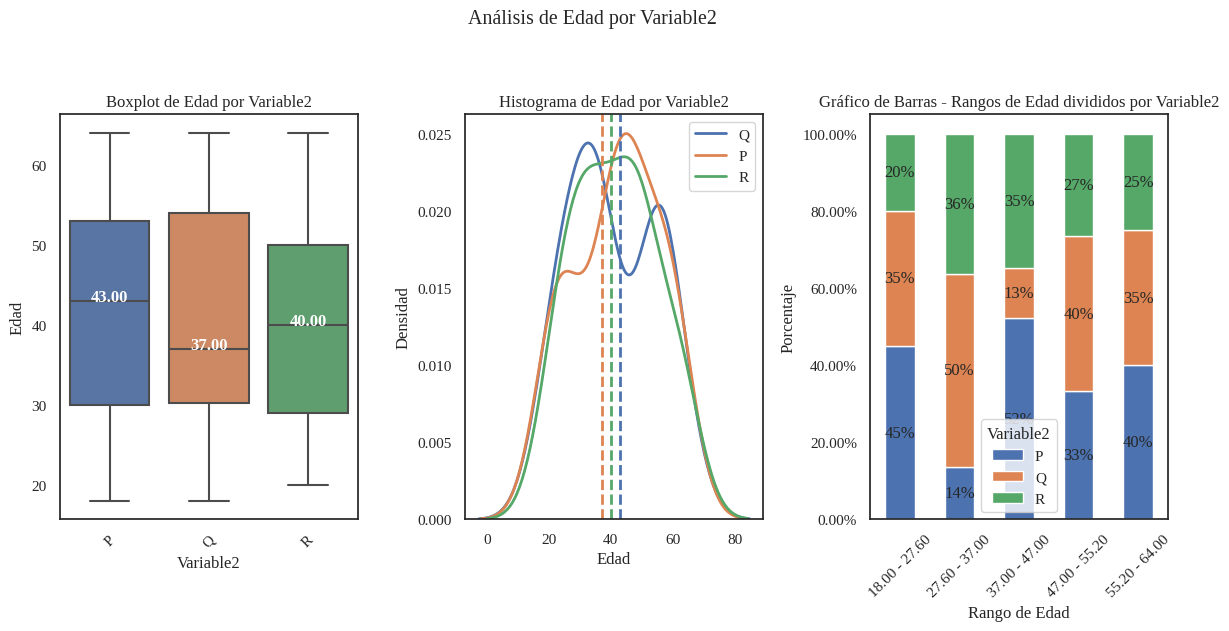

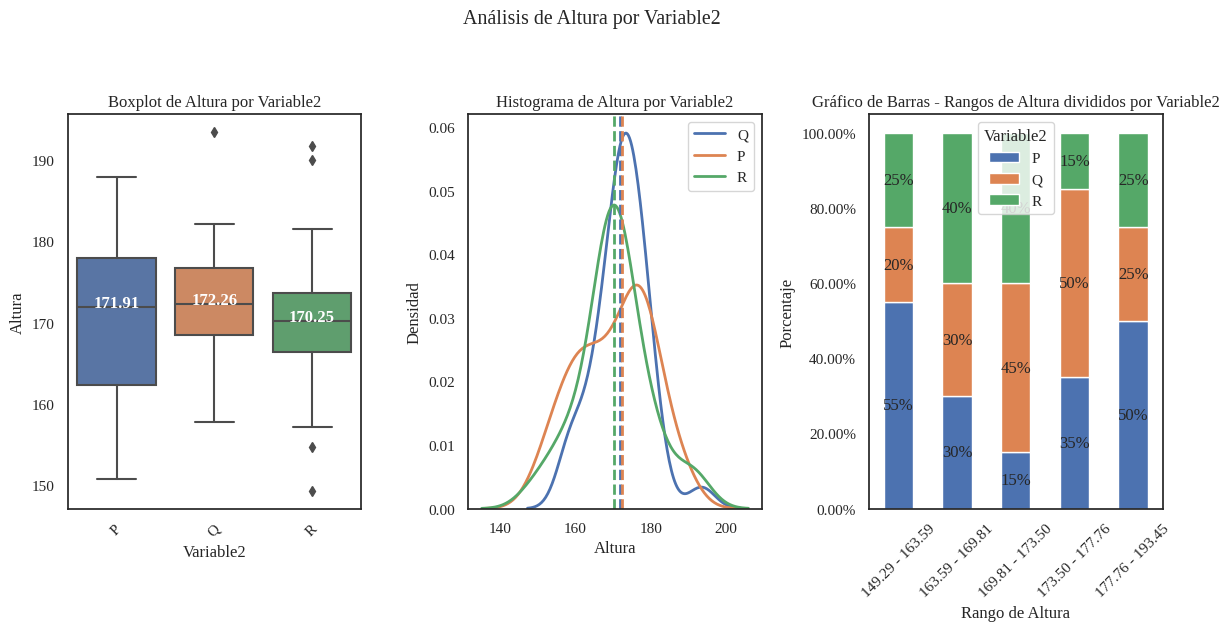

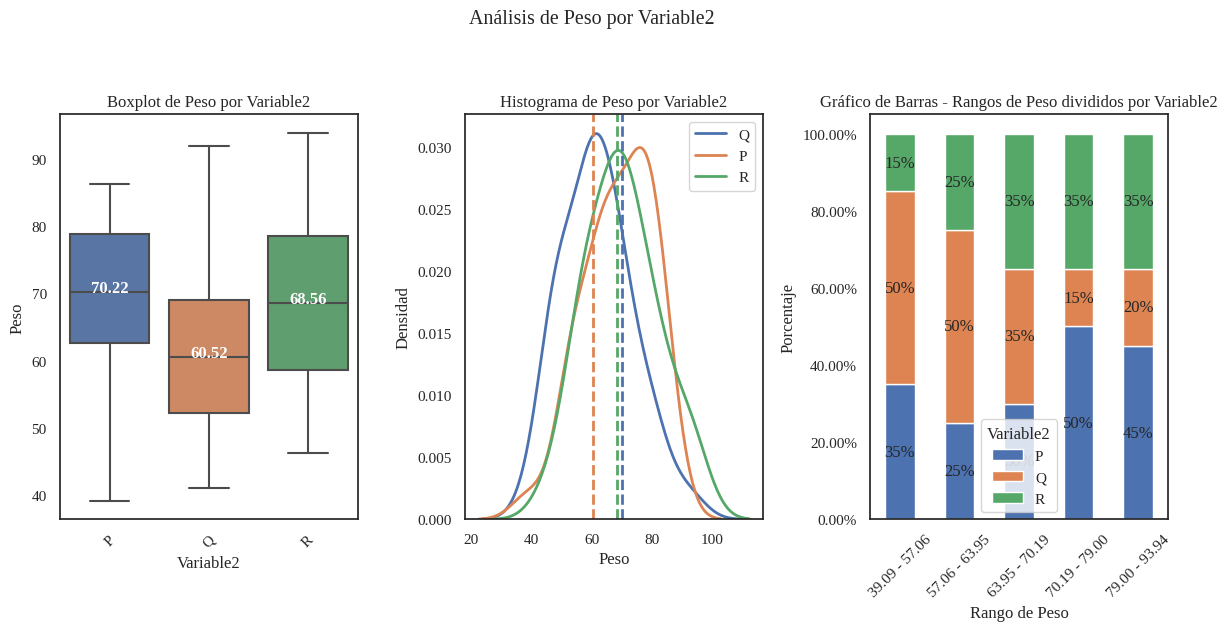

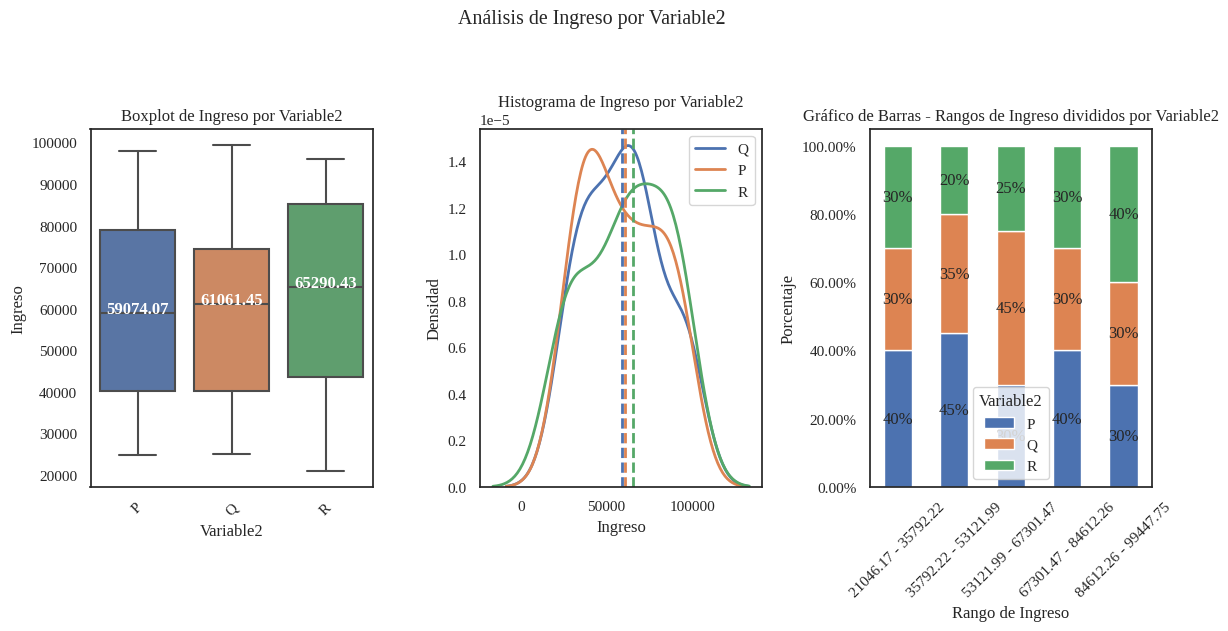

In [3]:
analizar_dataset(df)